# Lesson 8: Object Detection

## Basically, the idea is to use the object detection pipeline (hugging face) and helper functions to identify objects in pictures.
## Then turn the objects into words, also through the helper functions in the utils.py (with the a Variational Inference Text-to-Speech pipeline from hugging face)
## Then turn the texts into audio according to what was presented in L7.

- In the classroom, the libraries are already installed for you.
- If you would like to run this code on your own machine, you can install the following:

```
    !pip install transformers
    !pip install gradio
    !pip install timm
    !pip install inflect
    !pip install phonemizer
```

**Note:**  `py-espeak-ng` is only available Linux operating systems.

To run locally in a Linux machine, follow these commands:
```
    sudo apt-get update
    sudo apt-get install espeak-ng
    pip install py-espeak-ng
```

### Build the `object-detection` pipeline using 🤗 Transformers Library

- This model was release with the paper [End-to-End Object Detection with Transformers](https://arxiv.org/abs/2005.12872) from Carion et al. (2020)

In [2]:
# !pip install transformers
# !pip install gradio
# !pip install timm
# !pip install inflect
# !pip install phonemizer

In [4]:
from helper_8 import load_image_from_url, render_results_in_image

In [5]:
from transformers import pipeline

- Here is some code that suppresses warning messages.

In [7]:
from transformers.utils import logging
logging.set_verbosity_error()

from helper_8 import ignore_warnings
ignore_warnings()

In [9]:
od_pipe = pipeline("object-detection", "facebook/detr-resnet-50")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

Info about [facebook/detr-resnet-50](https://huggingface.co/facebook/detr-resnet-50)

Explore more of the [Hugging Face Hub for more object detection models](https://huggingface.co/models?pipeline_tag=object-detection&sort=trending)

### Use the Pipeline

In [10]:
from PIL import Image

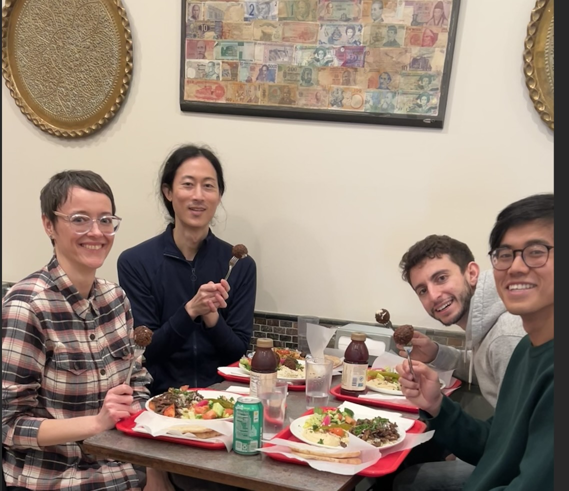

In [11]:
raw_image = Image.open('huggingface_friends.jpg')
raw_image.resize((569, 491))

In [38]:
pipeline_output = od_pipe(raw_image)
# from facebook/detr-resnet-50

[{'score': 0.5531191825866699, 'label': 'bowl', 'box': {'xmin': 286, 'ymin': 783, 'xmax': 501, 'ymax': 875}}, {'score': 0.5437579154968262, 'label': 'fork', 'box': {'xmin': 439, 'ymin': 496, 'xmax': 488, 'ymax': 569}}, {'score': 0.9856818318367004, 'label': 'fork', 'box': {'xmin': 808, 'ymin': 688, 'xmax': 836, 'ymax': 765}}, {'score': 0.9904230833053589, 'label': 'bottle', 'box': {'xmin': 688, 'ymin': 667, 'xmax': 743, 'ymax': 789}}, {'score': 0.9948464632034302, 'label': 'cup', 'box': {'xmin': 520, 'ymin': 770, 'xmax': 577, 'ymax': 863}}, {'score': 0.9971936941146851, 'label': 'person', 'box': {'xmin': 778, 'ymin': 387, 'xmax': 1125, 'ymax': 972}}, {'score': 0.5112541913986206, 'label': 'cup', 'box': {'xmin': 498, 'ymin': 681, 'xmax': 553, 'ymax': 733}}, {'score': 0.9695367217063904, 'label': 'bottle', 'box': {'xmin': 465, 'ymin': 786, 'xmax': 527, 'ymax': 912}}, {'score': 0.930081844329834, 'label': 'bowl', 'box': {'xmin': 556, 'ymin': 739, 'xmax': 622, 'ymax': 779}}, {'score': 0.63

In [39]:
print(pipeline_output)
print(type(pipeline_output))

[{'score': 0.5531191825866699, 'label': 'bowl', 'box': {'xmin': 286, 'ymin': 783, 'xmax': 501, 'ymax': 875}}, {'score': 0.5437579154968262, 'label': 'fork', 'box': {'xmin': 439, 'ymin': 496, 'xmax': 488, 'ymax': 569}}, {'score': 0.9856818318367004, 'label': 'fork', 'box': {'xmin': 808, 'ymin': 688, 'xmax': 836, 'ymax': 765}}, {'score': 0.9904230833053589, 'label': 'bottle', 'box': {'xmin': 688, 'ymin': 667, 'xmax': 743, 'ymax': 789}}, {'score': 0.9948464632034302, 'label': 'cup', 'box': {'xmin': 520, 'ymin': 770, 'xmax': 577, 'ymax': 863}}, {'score': 0.9971936941146851, 'label': 'person', 'box': {'xmin': 778, 'ymin': 387, 'xmax': 1125, 'ymax': 972}}, {'score': 0.5112541913986206, 'label': 'cup', 'box': {'xmin': 498, 'ymin': 681, 'xmax': 553, 'ymax': 733}}, {'score': 0.9695367217063904, 'label': 'bottle', 'box': {'xmin': 465, 'ymin': 786, 'xmax': 527, 'ymax': 912}}, {'score': 0.930081844329834, 'label': 'bowl', 'box': {'xmin': 556, 'ymin': 739, 'xmax': 622, 'ymax': 779}}, {'score': 0.63

- Return the results from the pipeline using the helper function `render_results_in_image`.

In [13]:
processed_image = render_results_in_image(
    raw_image,
    pipeline_output)

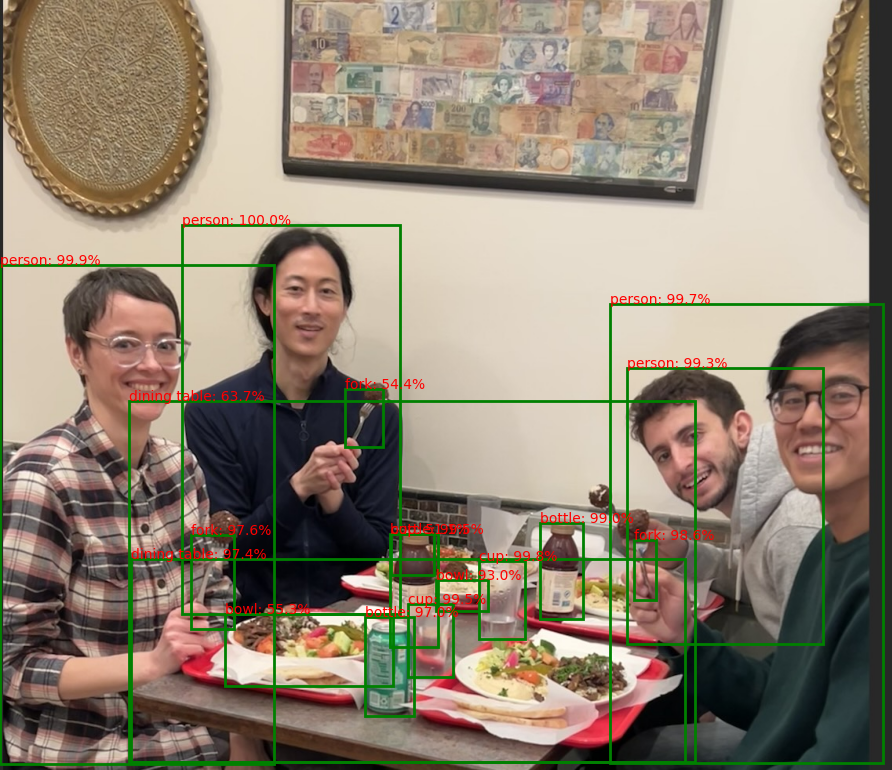

In [14]:
processed_image

### Using `Gradio` as a Simple Interface

- Use [Gradio](https://www.gradio.app) to create a demo for the object detection app.
- The demo makes it look friendly and easy to use.
- You can share the demo with your friends and colleagues as well.

In [15]:
import os
import gradio as gr

In [16]:
def get_pipeline_prediction(pil_image):

    pipeline_output = od_pipe(pil_image)

    processed_image = render_results_in_image(pil_image,
                                            pipeline_output)
    return processed_image

In [17]:
demo = gr.Interface(
  fn=get_pipeline_prediction,
  inputs=gr.Image(label="Input image",
                  type="pil"),
  outputs=gr.Image(label="Output image with predicted instances",
                   type="pil")
)

- `share=True` will provide an online link to access to the demo

In [18]:
demo.launch(share=True, server_port=int(8870))

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://3f1ad57652fa5f9488.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [19]:
demo.close()

Closing server running on port: 8870


### Close the app
- Remember to call `.close()` on the Gradio app when you're done using it.

### Make an AI Powered Audio Assistant

- Combine the object detector with a text-to-speech model that will help dictate what is inside the image.

- Inspect the output of the object detection pipeline.

In [20]:
pipeline_output

[{'score': 0.5531191825866699,
  'label': 'bowl',
  'box': {'xmin': 286, 'ymin': 783, 'xmax': 501, 'ymax': 875}},
 {'score': 0.5437579154968262,
  'label': 'fork',
  'box': {'xmin': 439, 'ymin': 496, 'xmax': 488, 'ymax': 569}},
 {'score': 0.9856818318367004,
  'label': 'fork',
  'box': {'xmin': 808, 'ymin': 688, 'xmax': 836, 'ymax': 765}},
 {'score': 0.9904230833053589,
  'label': 'bottle',
  'box': {'xmin': 688, 'ymin': 667, 'xmax': 743, 'ymax': 789}},
 {'score': 0.9948464632034302,
  'label': 'cup',
  'box': {'xmin': 520, 'ymin': 770, 'xmax': 577, 'ymax': 863}},
 {'score': 0.9971936941146851,
  'label': 'person',
  'box': {'xmin': 778, 'ymin': 387, 'xmax': 1125, 'ymax': 972}},
 {'score': 0.5112541913986206,
  'label': 'cup',
  'box': {'xmin': 498, 'ymin': 681, 'xmax': 553, 'ymax': 733}},
 {'score': 0.9695367217063904,
  'label': 'bottle',
  'box': {'xmin': 465, 'ymin': 786, 'xmax': 527, 'ymax': 912}},
 {'score': 0.930081844329834,
  'label': 'bowl',
  'box': {'xmin': 556, 'ymin': 739

In [21]:
od_pipe

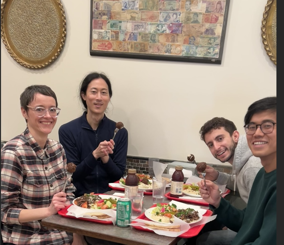

In [22]:
raw_image = Image.open('huggingface_friends.jpg')
raw_image.resize((284, 245))

In [25]:
from helper_8 import summarize_predictions_natural_language

In [26]:
text = summarize_predictions_natural_language(pipeline_output)

In [27]:
text

'In this image, there are two bowls three forks three bottles three cups four persons and two dining tables.'

### Generate Audio Narration of an Image

In [29]:
tts_pipe = pipeline("text-to-speech",
                    model="kakao-enterprise/vits-ljs")

# Variational Inference Text-to-Speech

config.json:   0%|          | 0.00/1.64k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/145M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.14k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/47.0 [00:00<?, ?B/s]

In [33]:
# !apt-get install espeak

More info about [kakao-enterprise/vits-ljs](https://huggingface.co/kakao-enterprise/vits-ljs).

In [34]:
narrated_text = tts_pipe(text)

### Play the Generated Audio

#### from l7

In [35]:
from IPython.display import Audio as IPythonAudio

In [36]:

IPythonAudio(narrated_text["audio"][0],
             rate=narrated_text["sampling_rate"])

### Try it yourself!
- Try these models with other images!

In [44]:
# put things together

raw_image = Image.open('my_pic.jpg')
raw_image.resize((200, 180))

pipeline_output = od_pipe(raw_image)
# from facebook/detr-resnet-50

processed_image = render_results_in_image(
    raw_image,
    pipeline_output)

In [ ]:
# raw_image = Image.open('huggingface_friends.jpg')
# raw_image.resize((569, 491))

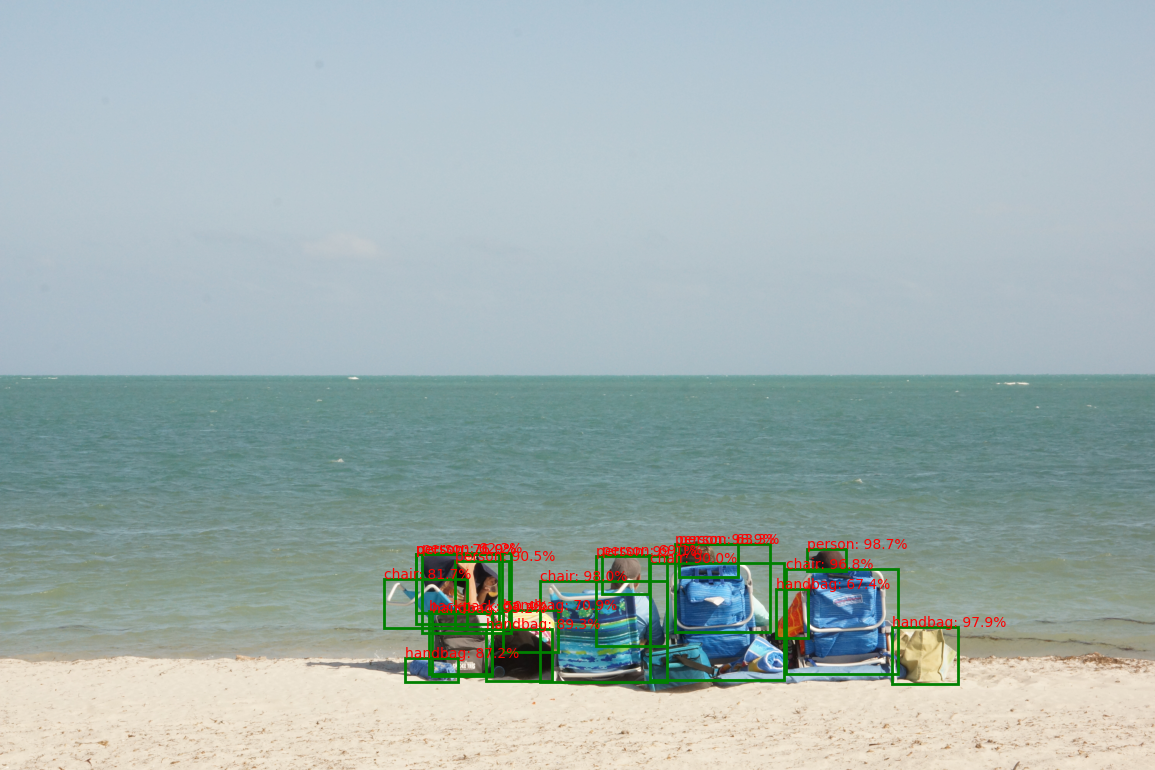

In [45]:
processed_image

In [46]:
print(pipeline_output)

[{'score': 0.6912469267845154, 'label': 'person', 'box': {'xmin': 3129, 'ymin': 2885, 'xmax': 3371, 'ymax': 3086}}, {'score': 0.7090270519256592, 'label': 'handbag', 'box': {'xmin': 2610, 'ymin': 3167, 'xmax': 2900, 'ymax': 3389}}, {'score': 0.5042675733566284, 'label': 'backpack', 'box': {'xmin': 2230, 'ymin': 3175, 'xmax': 2555, 'ymax': 3500}}, {'score': 0.9683915972709656, 'label': 'chair', 'box': {'xmin': 4083, 'ymin': 2955, 'xmax': 4666, 'ymax': 3501}}, {'score': 0.9792147874832153, 'label': 'handbag', 'box': {'xmin': 4633, 'ymin': 3259, 'xmax': 4976, 'ymax': 3552}}, {'score': 0.8933402895927429, 'label': 'handbag', 'box': {'xmin': 2525, 'ymin': 3268, 'xmax': 2866, 'ymax': 3535}}, {'score': 0.8721342086791992, 'label': 'handbag', 'box': {'xmin': 2103, 'ymin': 3416, 'xmax': 2380, 'ymax': 3544}}, {'score': 0.769114077091217, 'label': 'person', 'box': {'xmin': 2159, 'ymin': 2876, 'xmax': 2590, 'ymax': 3241}}, {'score': 0.9054996967315674, 'label': 'person', 'box': {'xmin': 2364, 'ymi

In [47]:
demo.launch(share=True, server_port=int(8870))

Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://3f1ad57652fa5f9488.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [48]:
demo.close()

Closing server running on port: 8870


In [49]:
pipeline_output

# to text, let's see what's inside a picture

[{'score': 0.6912469267845154,
  'label': 'person',
  'box': {'xmin': 3129, 'ymin': 2885, 'xmax': 3371, 'ymax': 3086}},
 {'score': 0.7090270519256592,
  'label': 'handbag',
  'box': {'xmin': 2610, 'ymin': 3167, 'xmax': 2900, 'ymax': 3389}},
 {'score': 0.5042675733566284,
  'label': 'backpack',
  'box': {'xmin': 2230, 'ymin': 3175, 'xmax': 2555, 'ymax': 3500}},
 {'score': 0.9683915972709656,
  'label': 'chair',
  'box': {'xmin': 4083, 'ymin': 2955, 'xmax': 4666, 'ymax': 3501}},
 {'score': 0.9792147874832153,
  'label': 'handbag',
  'box': {'xmin': 4633, 'ymin': 3259, 'xmax': 4976, 'ymax': 3552}},
 {'score': 0.8933402895927429,
  'label': 'handbag',
  'box': {'xmin': 2525, 'ymin': 3268, 'xmax': 2866, 'ymax': 3535}},
 {'score': 0.8721342086791992,
  'label': 'handbag',
  'box': {'xmin': 2103, 'ymin': 3416, 'xmax': 2380, 'ymax': 3544}},
 {'score': 0.769114077091217,
  'label': 'person',
  'box': {'xmin': 2159, 'ymin': 2876, 'xmax': 2590, 'ymax': 3241}},
 {'score': 0.9054996967315674,
  'la

In [51]:
text = summarize_predictions_natural_language(pipeline_output)
text
# not true though, only four people.

'In this image, there are nine persons six handbags one backpack and four chairs.'

In [52]:
narrated_text = tts_pipe(text)
IPythonAudio(narrated_text["audio"][0],
             rate=narrated_text["sampling_rate"])